### DNN

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 데이터 로드
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 정규화 (0~1)
x_train = x_train / 255.0
x_test = x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# DNN 모델 구성
model_dnn = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model_dnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 컴파일
model_dnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [5]:
# 모델 학습
history_dnn = model_dnn.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=30,
    batch_size=128,
    verbose=2
)

Epoch 1/30
422/422 - 7s - 16ms/step - accuracy: 0.7742 - loss: 0.6330 - val_accuracy: 0.8535 - val_loss: 0.4029
Epoch 2/30
422/422 - 1s - 2ms/step - accuracy: 0.8389 - loss: 0.4451 - val_accuracy: 0.8572 - val_loss: 0.3893
Epoch 3/30
422/422 - 1s - 2ms/step - accuracy: 0.8555 - loss: 0.3997 - val_accuracy: 0.8682 - val_loss: 0.3530
Epoch 4/30
422/422 - 1s - 3ms/step - accuracy: 0.8642 - loss: 0.3749 - val_accuracy: 0.8675 - val_loss: 0.3576
Epoch 5/30
422/422 - 1s - 3ms/step - accuracy: 0.8684 - loss: 0.3585 - val_accuracy: 0.8752 - val_loss: 0.3345
Epoch 6/30
422/422 - 1s - 3ms/step - accuracy: 0.8735 - loss: 0.3462 - val_accuracy: 0.8820 - val_loss: 0.3222
Epoch 7/30
422/422 - 1s - 4ms/step - accuracy: 0.8794 - loss: 0.3318 - val_accuracy: 0.8835 - val_loss: 0.3187
Epoch 8/30
422/422 - 1s - 3ms/step - accuracy: 0.8817 - loss: 0.3215 - val_accuracy: 0.8838 - val_loss: 0.3114
Epoch 9/30
422/422 - 1s - 3ms/step - accuracy: 0.8844 - loss: 0.3125 - val_accuracy: 0.8825 - val_loss: 0.3238


In [6]:
# 학습 곡선
acc = history_dnn.history['accuracy']
val_acc = history_dnn.history['val_accuracy']
loss = history_dnn.history['loss']
val_loss = history_dnn.history['val_loss']

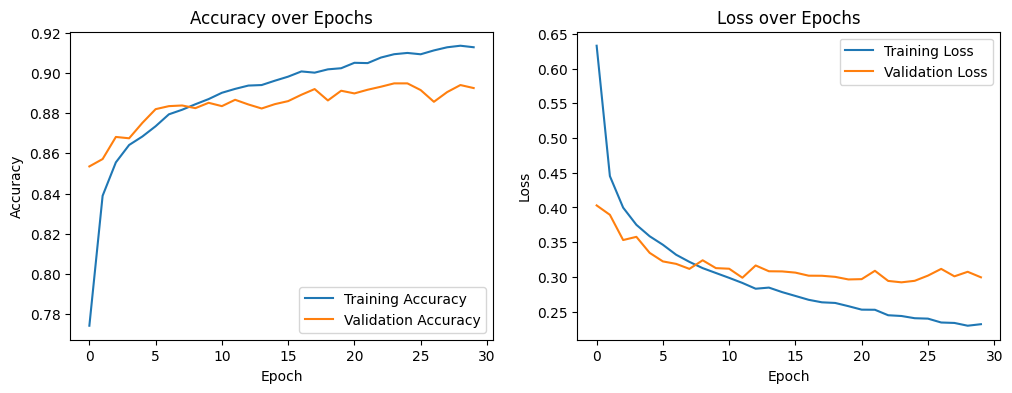

In [7]:
# 학습 과정 시각화 (정확도 및 손실)
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
# 평가
test_loss, test_acc = model_dnn.evaluate(x_test, y_test, verbose=2)
print(f"DNN Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 5ms/step - accuracy: 0.8923 - loss: 0.3120
DNN Test Accuracy: 0.8923


### CNN

In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [10]:
# 데이터 로드
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 정규화 (0~1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
# 채널 차원 추가 (np.expand_dims 이용)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)  # (60000, 28, 28, 1)
print("x_test shape:", x_test.shape)    # (10000, 28, 28, 1)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [12]:
# CNN 모델 정의
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델 요약
model_cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# 모델 학습
history_cnn = model_cnn.fit(
    x_train, y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/30
422/422 - 10s - 24ms/step - accuracy: 0.7709 - loss: 0.6190 - val_accuracy: 0.8512 - val_loss: 0.3931
Epoch 2/30
422/422 - 2s - 4ms/step - accuracy: 0.8606 - loss: 0.3824 - val_accuracy: 0.8793 - val_loss: 0.3300
Epoch 3/30
422/422 - 2s - 4ms/step - accuracy: 0.8807 - loss: 0.3261 - val_accuracy: 0.8883 - val_loss: 0.2982
Epoch 4/30
422/422 - 2s - 5ms/step - accuracy: 0.8926 - loss: 0.2968 - val_accuracy: 0.8937 - val_loss: 0.2899
Epoch 5/30
422/422 - 2s - 5ms/step - accuracy: 0.8996 - loss: 0.2727 - val_accuracy: 0.8952 - val_loss: 0.2776
Epoch 6/30
422/422 - 2s - 4ms/step - accuracy: 0.9051 - loss: 0.2580 - val_accuracy: 0.9022 - val_loss: 0.2605
Epoch 7/30
422/422 - 2s - 4ms/step - accuracy: 0.9097 - loss: 0.2420 - val_accuracy: 0.9072 - val_loss: 0.2489
Epoch 8/30
422/422 - 2s - 4ms/step - accuracy: 0.9153 - loss: 0.2278 - val_accuracy: 0.9095 - val_loss: 0.2448
Epoch 9/30
422/422 - 2s - 4ms/step - accuracy: 0.9192 - loss: 0.2154 - val_accuracy: 0.9083 - val_loss: 0.2468

In [16]:
# 학습 곡선 시각화
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

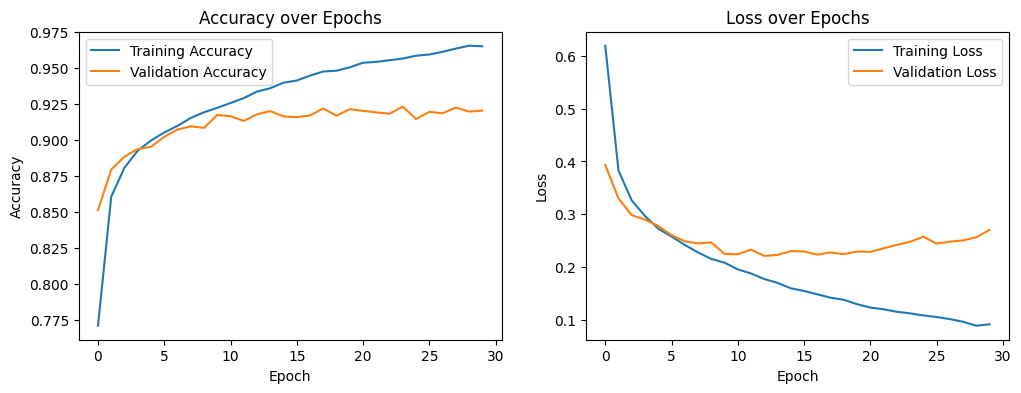

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
# 평가
test_loss, test_acc = model_cnn.evaluate(x_test, y_test, verbose=2)
print(f"CNN Test Accuracy: {test_acc:.4f}")

# 예측 예시
predictions = model_cnn.predict(x_test[:5])
print("예측 결과:", np.argmax(predictions, axis=1))
print("실제 레이블:", y_test[:5])

313/313 - 1s - 3ms/step - accuracy: 0.9156 - loss: 0.3050
CNN Test Accuracy: 0.9156
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
예측 결과: [9 2 1 1 6]
실제 레이블: [9 2 1 1 6]
